# COGS 118b - Determining Song Genre by Characteristics and Analysis of the Evolution of Genres from 2010-2019

## Setup

In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Exploring Data

Data aquired from https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

In [2]:
top50s = pd.read_csv("top50s_2010-2019.csv", encoding='cp1252')
top50s

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
characteristics_columns=top50s.columns[4:]
characteristics_columns

Index(['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch',
       'pop'],
      dtype='object')

array([<AxesSubplot:title={'center':'bpm'}>,
       <AxesSubplot:title={'center':'nrgy'}>,
       <AxesSubplot:title={'center':'dnce'}>,
       <AxesSubplot:title={'center':'dB'}>,
       <AxesSubplot:title={'center':'live'}>,
       <AxesSubplot:title={'center':'val'}>,
       <AxesSubplot:title={'center':'dur'}>,
       <AxesSubplot:title={'center':'acous'}>,
       <AxesSubplot:title={'center':'spch'}>,
       <AxesSubplot:title={'center':'pop'}>], dtype=object)

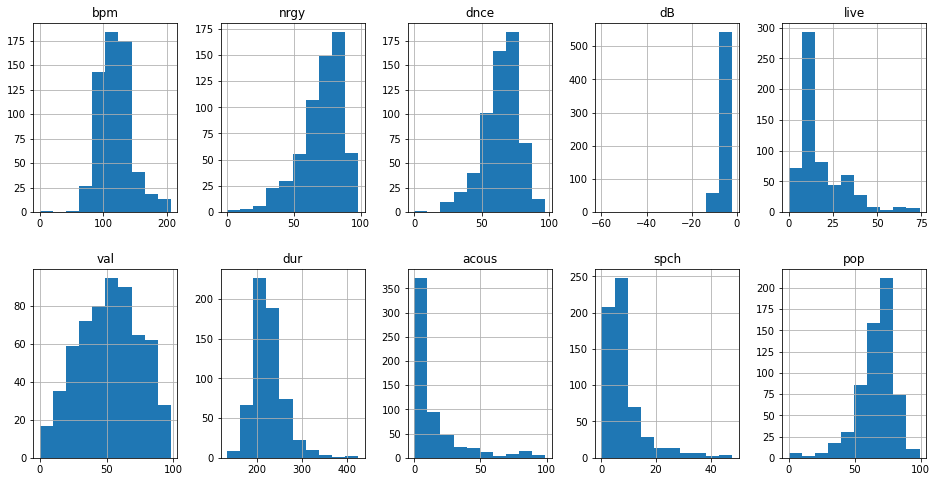

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
top50s.hist(column=characteristics_columns, ax=axes)

In [5]:
characteristics_matrix=top50s[characteristics_columns].to_numpy().transpose()
c_matrix=characteristics_matrix # to shorten this name
c_matrix

array([[ 97,  87, 120, ..., 136, 114, 150],
       [ 89,  93,  84, ...,  76,  79,  44],
       [ 67,  75,  76, ...,  53,  60,  70],
       ...,
       [ 19,  24,  10, ...,   7,   1,   6],
       [  4,  23,  14, ...,  34,   7,   6],
       [ 83,  82,  80, ...,  70,  69,  67]], dtype=int64)

In the above matrix, each column represents the characteristics for a song, to better match what we did in HW 4.

## PCA for Dimensionality Reduction

In [6]:
mean_c=np.mean(c_matrix, axis=1, keepdims=True)
mean_c

array([[118.54560531],
       [ 70.50414594],
       [ 64.37976783],
       [ -5.5787728 ],
       [ 17.77446103],
       [ 52.22553897],
       [224.67495854],
       [ 14.32669983],
       [  8.35820896],
       [ 66.52072968]])

In [7]:
c_diff=c_matrix-mean_c
c_diff

array([[-21.54560531, -31.54560531,   1.45439469, ...,  17.45439469,
         -4.54560531,  31.45439469],
       [ 18.49585406,  22.49585406,  13.49585406, ...,   5.49585406,
          8.49585406, -26.50414594],
       [  2.62023217,  10.62023217,  11.62023217, ..., -11.37976783,
         -4.37976783,   5.62023217],
       ...,
       [  4.67330017,   9.67330017,  -4.32669983, ...,  -7.32669983,
        -13.32669983,  -8.32669983],
       [ -4.35820896,  14.64179104,   5.64179104, ...,  25.64179104,
         -1.35820896,  -2.35820896],
       [ 16.47927032,  15.47927032,  13.47927032, ...,   3.47927032,
          2.47927032,   0.47927032]])

In [8]:
# eigenvectors of AA^T
# ???
# profit